In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from GMesh import RegularCoord

help(RegularCoord)

Help on class RegularCoord in module GMesh:

class RegularCoord(builtins.object)
 |  RegularCoord(n, origin, periodic, degppi=180)
 |  
 |  Container for uniformly spaced global cell center coordinate parameters
 |  
 |  For use with uniformly gridded data that has cell center global coordinates
 |  
 |  Methods defined here:
 |  
 |  __init__(self, n, origin, periodic, degppi=180)
 |      Create a RegularCoord
 |      n         is number of cells;
 |      origin    is the coordinate on the left edge (not first);
 |      periodic  distinguishes between longitude and latitude
 |  
 |  __repr__(self)
 |      Return repr(self).
 |  
 |  indices(self, x, bound_subset=False)
 |      Return indices of cells that contain x
 |      
 |      If RegularCoord is non-periodic (i.e. latitude), out of range values of "x" will be clipped to -90..90 .
 |      If regularCoord is periodic, any value of x will be globally wrapped.
 |      If RegularCoord is a subset, then "x" will be clipped to the bound

In [3]:
print( RegularCoord(4, -90, False) )
print( RegularCoord(3, -90, False) )
print( RegularCoord(4, -180, True) )
print( RegularCoord(4, 0, True) )
print( RegularCoord(3, -180, True) )
print( RegularCoord(3, 0, True) )
print( RegularCoord(4, 0, True).indices([0, 1, 89, 90, 180, 359, 360]) ) # 0, 0, 0, 1, 2, 3, 0
print( RegularCoord(720, 0, True).indices([0, 1, 359, 360]) ) # 0, 2, 718, 0
print( RegularCoord(360, 0, True).subset( slice(0,20) ) )
print( RegularCoord(360, 0, True).subset( slice(0,20) ).indices([0, 1, 9, 10, 180, 360], bound_subset=True ) ) # 0, 1, 9, 10, 19, 0
print( RegularCoord(360, 0, True).subset( slice(5,25) ) )
print( RegularCoord(360, 0, True).subset( slice(5,25) ).indices([0, 1, 9, 10, 180, 360], bound_subset=True ) ) # 0, 0, 4, 5, 19, 0

<RegularCoord n=4, dx=45.0, rdx=0.022222222222222223, x0=-90, io=-2, rem=0.0, is-ie=0-4, periodic=False>
<RegularCoord n=3, dx=60.0, rdx=0.016666666666666666, x0=-90, io=-2, rem=0.5, is-ie=0-3, periodic=False>
<RegularCoord n=4, dx=90.0, rdx=0.011111111111111112, x0=-180, io=-2, rem=0.0, is-ie=0-4, periodic=True>
<RegularCoord n=4, dx=90.0, rdx=0.011111111111111112, x0=0, io=0, rem=0.0, is-ie=0-4, periodic=True>
<RegularCoord n=3, dx=120.0, rdx=0.008333333333333333, x0=-180, io=-2, rem=0.5, is-ie=0-3, periodic=True>
<RegularCoord n=3, dx=120.0, rdx=0.008333333333333333, x0=0, io=0, rem=0.0, is-ie=0-3, periodic=True>
[0 0 0 1 2 3 0]
[  0   2 718   0]
<RegularCoord n=360, dx=1.0, rdx=1.0, x0=0, io=0, rem=0.0, is-ie=0-20, periodic=True>
[ 0  1  9 10 19  0]
<RegularCoord n=360, dx=1.0, rdx=1.0, x0=0, io=0, rem=0.0, is-ie=5-25, periodic=True>
[ 0  0  4  5 19  0]


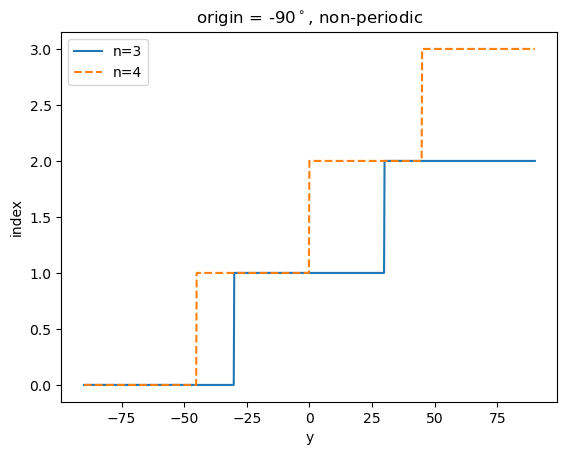

In [4]:
y = np.linspace(-90,90,180*5+1)
plt.plot( y, RegularCoord(3,-90,False).indices(y), label='n=3' );
plt.plot( y, RegularCoord(4,-90,False).indices(y), '--', label='n=4' );
plt.legend();plt.xlabel('y'); plt.ylabel('index'); plt.title('origin = -90$^\circ$, non-periodic');

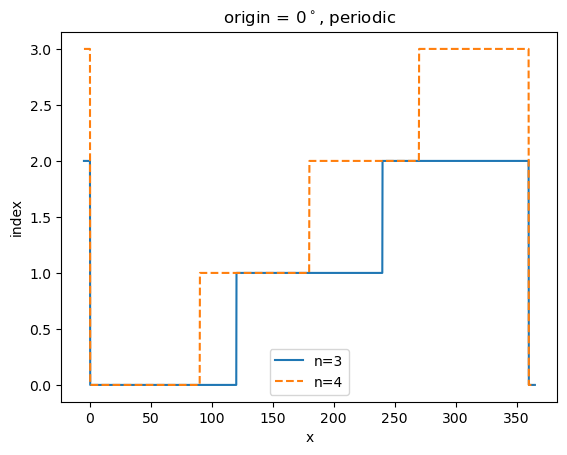

In [5]:
x = np.linspace(-5,365,360*5+1)
plt.plot( x, RegularCoord(3,0,True).indices(x), label='n=3');
plt.plot( x, RegularCoord(4,0,True).indices(x), '--', label='n=4');
plt.legend(); plt.xlabel('x'); plt.ylabel('index'); plt.title('origin = 0$^\circ$, periodic');

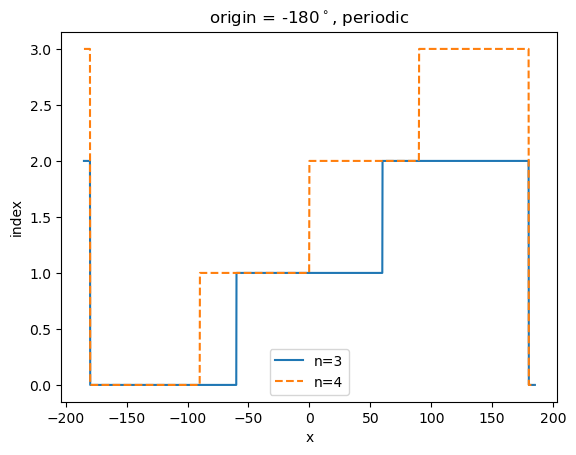

In [6]:
x = np.linspace(-185,185,360*5+1)
plt.plot( x, RegularCoord(3,-180,True).indices(x), label='n=3');
plt.plot( x, RegularCoord(4,-180,True).indices(x), '--', label='n=4');
plt.legend(); plt.xlabel('x'); plt.ylabel('index'); plt.title('origin = -180$^\circ$, periodic');